In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score

In [ ]:
#data loading
df=pd.read_csv('ai4i2020.csv')
print(f'data shape {df.shape}')

data shape (10000, 14)


In [4]:
#data  exploring
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [5]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
#cleaning and preparing the data 
#1- drping the UDI and product ID
df.drop(['UDI','Product ID'],axis=1,inplace=True)


In [ ]:
#2- convert the categorical column 'Type' into numerical values [M,L,H] to [0,1,2]
df['Type']=df['Type'].map({'M':0,'L':1,'H':2})

# or by using label encoder
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#df['Type'] = le.fit_transform(df['Type'])


<Axes: xlabel='Machine failure'>

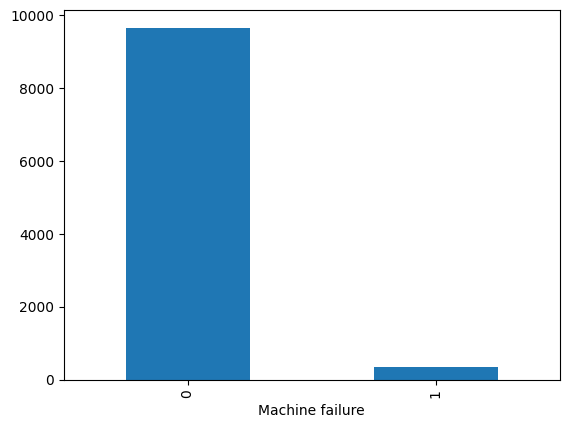

In [14]:
df['Machine failure'].value_counts().plot(kind='bar')

In [ ]:
#3- separate features from target
X=df.drop(['Machine failure'],axis=1)
y=df['Machine failure']

In [ ]:
# 4-spliting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Exploratory Data Analysis (EDA) 

In [17]:
sns.set(style="whitegrid")

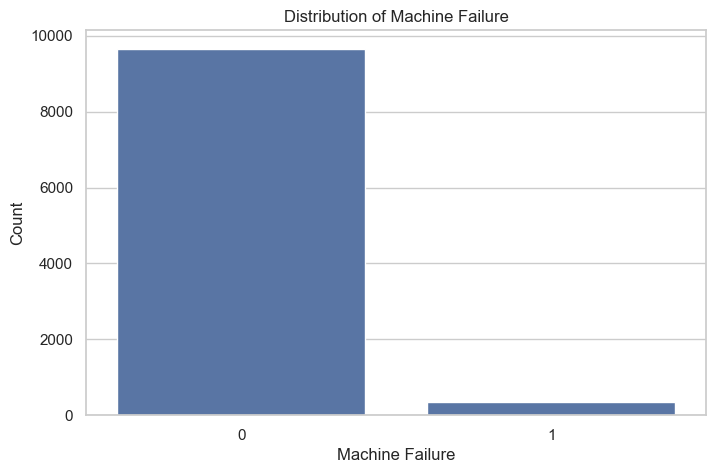

In [18]:
#plot 1 : Target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Machine failure', data=df)
plt.title('Distribution of Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.show()


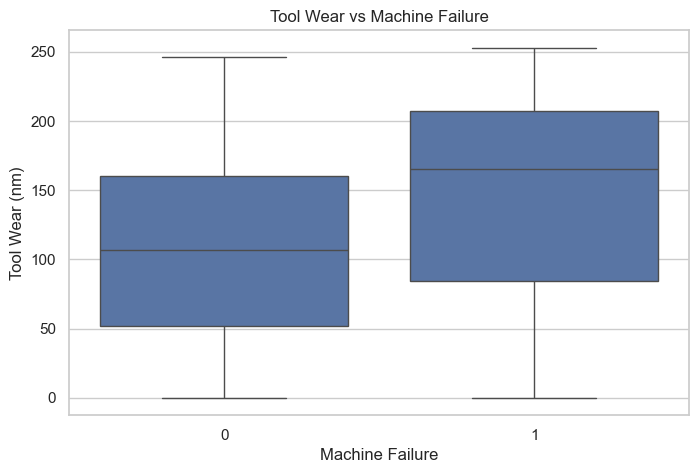

In [20]:
# plot 2 : Tool wear vs machine failure

plt.figure(figsize=(8, 5))
sns.boxplot(x='Machine failure', y='Tool wear [min]', data=df)
plt.title('Tool Wear vs Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Tool Wear (nm)')
plt.show()

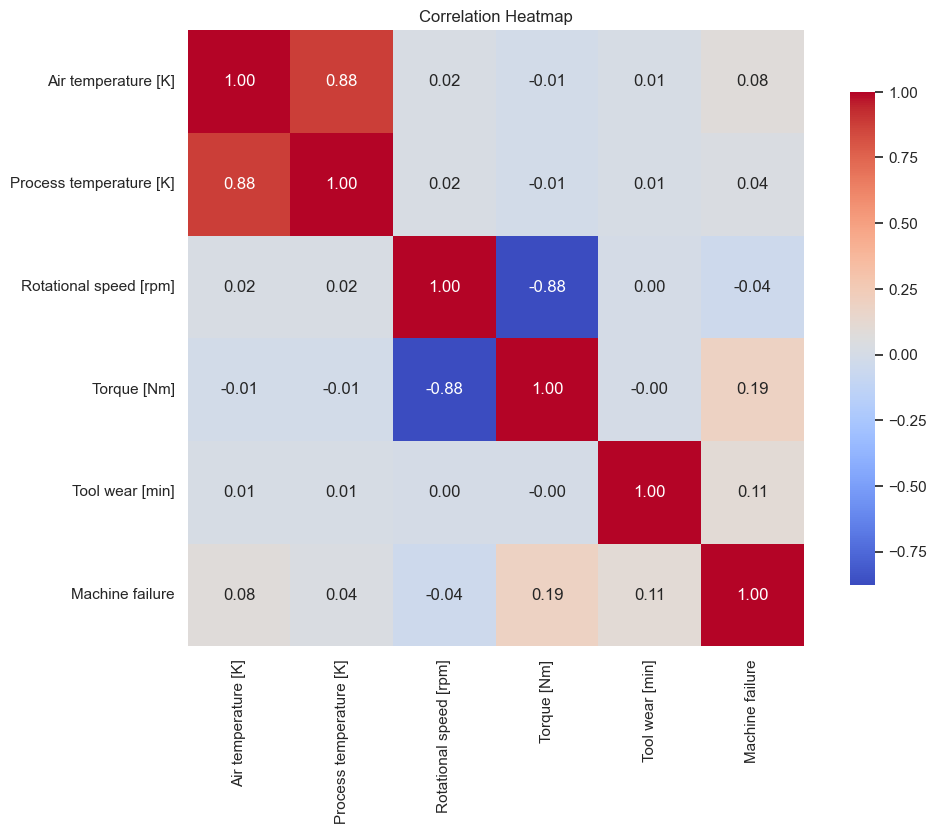

In [21]:
#plot 3 correlation heatmap 

plt.figure(figsize=(12, 8))
numeric_df=df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']]
corr_matrix=numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [27]:
#initialize the model 

model=RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')

#training 
model.fit(X_train, y_train)

#predicting
y_pred=model.predict(X_test)




In [ ]:
#fix  the imbalanced dataset issue

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42,stratify=y_resampled)

# Now train your model on X_train_resampled, y_train_resampled
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

In [37]:
#evaluating
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1933
           1       0.98      0.98      0.98      1932

    accuracy                           0.98      3865
   macro avg       0.98      0.98      0.98      3865
weighted avg       0.98      0.98      0.98      3865



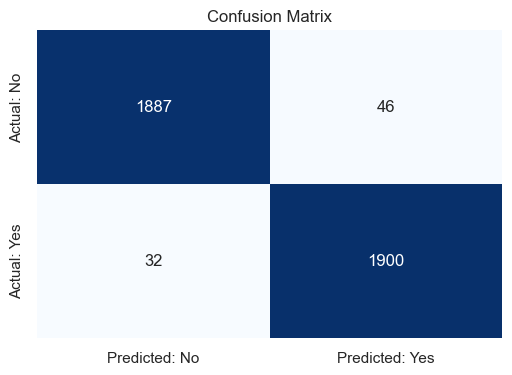

In [38]:

print(classification_report(y_test, y_pred))

# Plot a confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted: No', 'Predicted: Yes'],
            yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png', dpi=120, bbox_inches='tight')
plt.show()


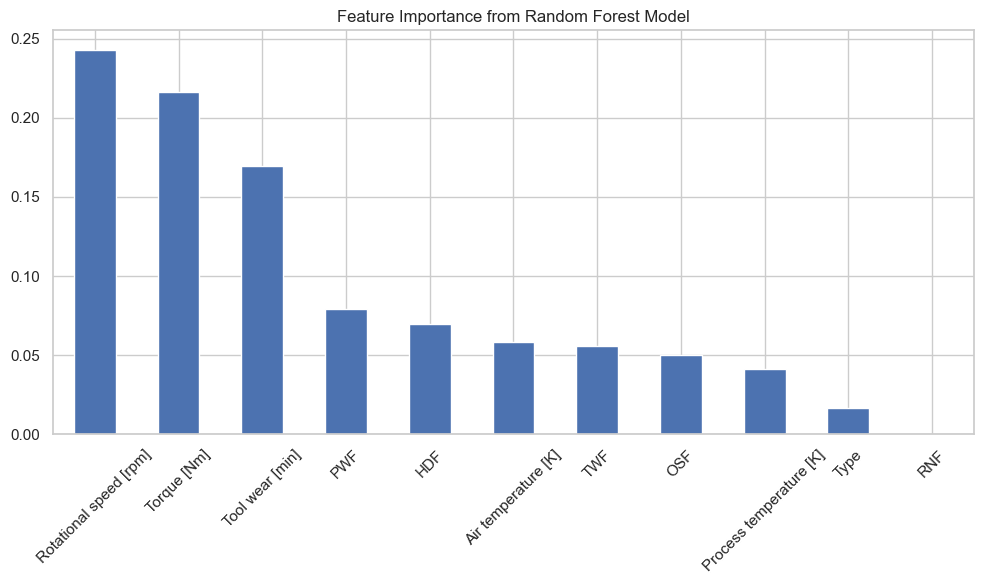

In [39]:

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=120, bbox_inches='tight')
plt.show()